<center><h1 style="font-size:26px;">Optimizing Public Safety and Traffic Management Through US Accident Data(2016-2023)</h1></center>

---

<div style="text-align: center;">
    <img src="https://github.com/shruthi0914/shruthi0914.github.io/blob/main/image.png?raw=true" alt="Description of the image" style="display: block; margin: 0 auto; max-width: 30%; height: auto;">
</div>

<center><h2 style="font-size:24px; font-weight:bold;">Table of Contents</h2></center>

[1. Introduction](#introduction)  
[2. Motivation](#motivation)  
[3. Understanding](#understanding)  
[4. Data Collection](#data-collection)  
[5. Data Preprocessing](#data-preprocessing)  
[6. Exploratory Data Analysis](#exploratory-data-analysis)  
[7. Full Model Implementation: Analysis, Hypothesis Testing and ML](#full-model-implementation-analysis-hypothesis-testing-and-ml)  
[8. Conclusion](#conclusion)  
[9. Subjective Evaluation](#subjective-evaluation)  
[10. Further Resources](#further-resources)

<a id="introduction"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Introduction</h2></center>

What if we could predict the severity of a road accident before it happens? What if we could use data to save lives, reduce traffic disruptions, and create safer roads for everyone? Our project, **"Optimizing Public Safety and Traffic Management Through US Accident Data (2016-2023)**", aims to turn these possibilities into reality.
Accidents don't just happen—they result from a complex mix of factors like weather, road design, and timing. By predicting accident severity, we can identify high-risk scenarios and provide actionable insights to traffic managers and policymakers. Through this project we focused on identifying the key factors driving accident outcomes and building predictive models to enhance our understanding of accident severity.

<a id="motivation"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Motivation</h2></center>

Our project, "Optimizing Public Safety and Traffic Management Through US Accident Data (2016-2023)," will contribute to the improvement of road safety and enhancement of traffic control systems, focusing on the prediction of auto accident severity on US-1, I-95, and some other highways. Using a dataset of more than 7.7 million accident records from 49 states from February 2016 to March 2023, we explored various factors influencing the severity of an accident due to weather conditions, geographical features, and time-based patterns. This study focuses on identifying high-risk situations and developing predictive models to offer insights for enhancing traffic control and road safety.

**General Relevance:**

Accidents that happen on the highways result in severe injuries and long-term disabilities and sometimes may also cost someone's life. These also pose challenges beyond public safety; they may lead to long delays in traffic and mobility disruptions due to blocked lanes. Economically, they pose direct costs, such as medical costs, vehicle repairs, shipment delays, and lack of productivity. Additionally, they affect the environment by causing vehicles to be idle for a long time, which increases fuel consumption. Moreover, the families of those involved in accidents go through a lot of emotional trauma. Therefore, our analysis in this project will help to improve road safety. By predicting how serious the accident is, we will be able to take actions that might probably reduce the risk and save lives. Thus, understanding the accident pattern can help traffic move smoothly on highways such as I-95 and US-1.

**Relevance to Data Science:**

From the data science perspective, this project demonstrates how data science techniques—such as data analysis and modeling—can be applied to large datasets to address real-world challenges. It predicts the severity of accidents on US-1, I-95, and State Hwy 42 by analyzing various contributing factors. The process includes data cleaning, exploratory analysis to identify key insights (e.g., the impact of weather and high accident rates on I-95), and modeling using logistic regression, random forests, and gradient boosting. Ultimately, the project provides solutions for improving public safety, optimizing traffic management, and supporting informed policy decisions.

<a id="understanding"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Understanding</h2></center>

**For the Uninformed Reader:**

An uniformed reader would leave feeling informed about our project, as one would have a clear and thorough understanding of the topic that starts with the importance of accident analysis in highways. The tutorial addresses several challenges associated with the understanding and prediction of such accidents-dealing with heterogeneity in data and identification of key influencing factors being some of them. It also explains important concepts such as the severity of accidents and contributing factors like weather, traffic patterns, and location, which help in analyzing the data and making predictions. It underlines certain facts, for example, the high frequency of accidents on I-95, the influence of weather conditions like fog and rain, and analyses of accidents in various cities. It also examines the relationship between weather conditions-temperature, visibility, and precipitation-and accident occurrences in a non-technical way that makes it accessible to readers unfamiliar with the topic. In addition, cluster analysis of accidents using features like weather conditions, precipitation, and severity adds an overall perspective and presents clear patterns and trends for the benefit of the readers who are not initiated into the topic. 

**For Familiar Readers:**

Those already aware of the methods of accident analysis or data science will go more deeply into the insights and advanced application of these methods. In this project, the application of Machine Learning Algorithms such as logistic regression, random forests, and gradient boosting machine learning models can predict the severity of an accident effectively. It also addresses challenges like data heterogeneity and multicollinearity, which are critical in real-world datasets. In addition, higher-order analyses are included in the project: clustering accidents based on weather conditions, severity, and precipitation. The clustering approach uncovers hidden patterns not immediately visible that can highlight high-risk accidents and scenarios that contribute to them. Moreover, the combination of predictive modeling and clustering provides actionable insights into accident-prone zones and weather conditions that increase the risk of accidents. The depth of such analysis, combined with exploratory data visualizations and predictive techniques, offers new insights even to the most seasoned reader.

<a id="data-collection"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Data Collection</h2></center>

In this section, we use Python to retrieve and analyze pertinent accident data from our data sources. The dataset was loaded into a pandas DataFrame for analysis. The focus is on the county level, examining the frequency, severity, and contributing factors of accidents, alongside relevant details such as location, time, and environmental conditions.

In [15]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Import additional libraries for handling JSON, datetime operations, and statistical transformations
import json
from datetime import datetime
import glob
import re
import os
import io
from scipy.stats import boxcox

In [16]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [17]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

<a id="data-preprocessing"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Data Preprocessing</h2></center>

In this section, we will refine the dataset by addressing missing values, removing redundant features, and standardizing categorical variables such as wind direction and weather conditions. Missing data will be imputed using appropriate techniques, and irrelevant or inconsistent columns will be removed. Additional features related to weather conditions will be created to provide more meaningful insights. Outliers in numerical columns will be handled to ensure the data is clean, consistent, and ready for analysis.

In [20]:
# Check for missing values in each column
missing_values = df.isnull().sum()

In [21]:
# Calculate and display the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

**Redundant Features**

The dataset includes data from two sources: MapQuest and Bing. Both report severity levels differently—Bing uses 4 levels, while MapQuest uses 5. According to the dataset creator, a direct 1:1 mapping between the two severity scales is not possible. Therefore, Bing data was removed since it only includes a severity index of 4.

In [24]:
# Filter the data where 'Source' is "MapQuest"
accidents_df = df[df['Source'] == "MapQuest"]

# Drop the 'Source' column from the DataFrame
accidents_df = df.drop(columns=['Source'])

# Print the shape of the resulting DataFrame
print(f"The shape of the filtered data is: {accidents_df.shape}")

The shape of the filtered data is: (7728394, 45)


In [25]:
# Drop the 'ID' column as it does not provide meaningful information about accidents
accidents_df = accidents_df.drop(['ID'], axis=1)

**Categorical Features**

In [27]:
categorical_features = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing',
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

print("Unique count of categorical features:")

for i in categorical_features:
  print(i,accidents_df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [28]:
# Drop 'Country' and 'Turning_Loop' as they contain only one unique value
accidents_df = accidents_df.drop(['Country','Turning_Loop'], axis=1)

**Cleaning and Simplyfying Wind Direction**

This code normalizes the values in the Wind_Direction column of the 'accidents_df' dataframe, replacing various representations of wind directions with their most abbreviated forms—for example, replacing 'West' and 'WSW' with 'W'.

In [31]:
print("Unique Wind Directions: ", accidents_df['Wind_Direction'].unique())

Unique Wind Directions:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [32]:
# Standardize wind direction categories
accidents_df['Wind_Direction'] = accidents_df['Wind_Direction'].replace({
    'Calm': 'CALM',
    'West': 'W', 'WSW': 'W', 'WNW': 'W',
    'South': 'S', 'SSW': 'S', 'SSE': 'S',
    'North': 'N', 'NNW': 'N', 'NNE': 'N',
    'East': 'E', 'ESE': 'E', 'ENE': 'E',
    'Variable': 'VAR'
})

# Printing unique wind directions after standardization
print("Unique wind directions after standardization: ", accidents_df['Wind_Direction'].unique())

Unique wind directions after standardization:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


**Cleaning and Simplyfying Weather Condition**

This code extracts, cleans, and deduplicates distinctive weather conditions from the Weather_Condition column, using regex to split and standardize the data.

In [35]:
# Extract distinctive weather conditions
weather_conditions = accidents_df['Weather_Condition'].dropna().unique()
weather_conditions = [condition.strip() for item in weather_conditions 
                      for condition in re.split(r"!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", item)]
weather_conditions = sorted(set(weather_conditions))

# Display distinctive weather conditions
print("Distinctive Weather Conditions:", weather_conditions)

Distinctive Weather Conditions: ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Snow Showers', 'Squalls', 'T-St

By determining if certain weather conditions are present in the Weather_Condition column, the code adds binary columns for each, with 1 denoting presence and 0 denoting absence.

In [37]:
# Create new boolean columns for specific weather conditions
weather_features = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']
conditions_mapping = {
    'Clear': 'Clear', 
    'Cloud': 'Cloud|Overcast', 
    'Rain': 'Rain|storm', 
    'Heavy_Rain': 'Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', 
    'Snow': 'Snow|Sleet|Ice', 
    'Heavy_Snow': 'Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', 
    'Fog': 'Fog'
}

for feature, condition in conditions_mapping.items():
    accidents_df[feature] = accidents_df['Weather_Condition'].str.contains(condition, case=False, na=False).astype(int)

# Display updated DataFrame with new weather features
print(accidents_df[['Weather_Condition'] + weather_features].head())

  Weather_Condition  Clear  Cloud  Rain  Heavy_Rain  Snow  Heavy_Snow  Fog
0        Light Rain      0      0     1           0     0           0    0
1        Light Rain      0      0     1           0     0           0    0
2          Overcast      0      1     0           0     0           0    0
3     Mostly Cloudy      0      1     0           0     0           0    0
4     Mostly Cloudy      0      1     0           0     0           0    0


**Datetime Formatting and Feature Extraction**

The 'Weather_Timestamp' column is nearly identical to 'Start_Time', so we can retain only 'Start_Time'. We will then extract 'Year', 'Month', 'Weekday', 'Day' (of the year), 'Hour', and 'Minute' (of the day) from 'Start_Time'.

In [40]:
# Convert 'Start_Time' to datetime and extract useful components
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')
accidents_df['Year'] = accidents_df['Start_Time'].dt.year
accidents_df['Month'] = accidents_df['Start_Time'].dt.month
accidents_df['Weekday'] = accidents_df['Start_Time'].dt.weekday
accidents_df['Day'] = accidents_df['Start_Time'].dt.day
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
accidents_df['Minute'] = accidents_df['Start_Time'].dt.minute

# Display extracted datetime components
print(accidents_df[['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']].head())

           Start_Time    Year  Month  Weekday  Day  Hour  Minute
0 2016-02-08 05:46:00  2016.0    2.0      0.0  8.0   5.0    46.0
1 2016-02-08 06:07:59  2016.0    2.0      0.0  8.0   6.0     7.0
2 2016-02-08 06:49:27  2016.0    2.0      0.0  8.0   6.0    49.0
3 2016-02-08 07:23:34  2016.0    2.0      0.0  8.0   7.0    23.0
4 2016-02-08 07:39:07  2016.0    2.0      0.0  8.0   7.0    39.0


**Handling Missing Data**

For every column in the dataset, the code determines the overall number of missing values as well as their percentage. 

In [43]:
# Calculate the total missing values and their percentages for all columns
missing = accidents_df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing / len(accidents_df)) * 100

# Combine the missing values and percentages into a summary DataFrame
missing_summary = pd.DataFrame({'Total': missing, 'Percent': percent_missing})
missing_summary = missing_summary[missing_summary['Total'] > 0]

# Display the missing data summary
print(missing_summary)

                         Total    Percent
End_Lat                3402762  44.029355
End_Lng                3402762  44.029355
Precipitation(in)      2203586  28.512858
Wind_Chill(F)          1999019  25.865904
Month                   743166   9.616047
Start_Time              743166   9.616047
Year                    743166   9.616047
Minute                  743166   9.616047
Weekday                 743166   9.616047
Hour                    743166   9.616047
Day                     743166   9.616047
Wind_Speed(mph)         571233   7.391355
Visibility(mi)          177098   2.291524
Wind_Direction          175206   2.267043
Humidity(%)             174144   2.253301
Weather_Condition       173459   2.244438
Temperature(F)          163853   2.120143
Pressure(in)            140679   1.820288
Weather_Timestamp       120228   1.555666
Civil_Twilight           23246   0.300787
Nautical_Twilight        23246   0.300787
Astronomical_Twilight    23246   0.300787
Sunrise_Sunset           23246   0

In [44]:
accidents_df[['Start_Lat','Start_Lng','End_Lat','End_Lng']]

Start_Lat   Start_Lng   End_Lat    End_Lng
0        39.865147  -84.058723       NaN        NaN
1        39.928059  -82.831184       NaN        NaN
2        39.063148  -84.032608       NaN        NaN
3        39.747753  -84.205582       NaN        NaN
4        39.627781  -84.188354       NaN        NaN
...            ...         ...       ...        ...
7728389  34.002480 -117.379360  33.99888 -117.37094
7728390  32.766960 -117.148060  32.76555 -117.15363
7728391  33.775450 -117.847790  33.77740 -117.85727
7728392  33.992460 -118.403020  33.98311 -118.39565
7728393  34.133930 -117.230920  34.13736 -117.23934

[7728394 rows x 4 columns]

The decision to drop End_Lat and End_Lng was made due to their high similarity with Start_Lat and Start_Lng with End_Lat and End_Lng, respectively. This would help to avoid multicollinearity and also reduce data redundancy that may cause potential instability in the model with regard to correlated features.

In [46]:
# Drop End_Lat and End_Lng
lat_long=['End_Lat','End_Lng']
accidents_df=accidents_df.dropna(subset=lat_long)

In [47]:
# Calculate the total missing values and their percentages for all columns
missing = accidents_df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing / len(accidents_df)) * 100

# Combine the missing values and percentages into a summary DataFrame
missing_summary = pd.DataFrame({'Total': missing, 'Percent': percent_missing})
missing_summary = missing_summary[missing_summary['Total'] > 0]

# Display the missing data summary
print(missing_summary)

                        Total    Percent
Minute                 743166  17.180518
Hour                   743166  17.180518
Day                    743166  17.180518
Weekday                743166  17.180518
Month                  743166  17.180518
Year                   743166  17.180518
Start_Time             743166  17.180518
Precipitation(in)      625079  14.450582
Wind_Chill(F)          537575  12.427664
Wind_Speed(mph)        207813   4.804223
Wind_Direction         120494   2.785581
Humidity(%)            112506   2.600915
Visibility(mi)         111504   2.577750
Weather_Condition      108471   2.507634
Temperature(F)         106143   2.453815
Pressure(in)            91363   2.112131
Weather_Timestamp       79856   1.846112
Sunrise_Sunset          21571   0.498679
Civil_Twilight          21571   0.498679
Nautical_Twilight       21571   0.498679
Astronomical_Twilight   21571   0.498679
Airport_Code            16097   0.372131
Street                   9155   0.211645
Timezone        

This code preprocesses the accidents_df dataset, filling in missing values using imputation. **Numerical features** such as Humidity(%) and Precipitation(in) are **filled with '0' or median values**, adding a flag for missing precipitation. **Categorical features** include City and Sunrise_Sunset, imputed as 'Unknown,' while weather attributes use **mode imputation** based on Airport_Code and Month. **Time-based features**, such as Year and Hour, are extracted after imputing Start_Time using **forward/backward filling**. Text features (Street, Description) are set to defaults, and a final check is performed to ensure no missing values remain.

In [49]:
from collections import Counter
import pandas as pd

# Handle missing numerical features with 0 where appropriate
numerical_features = ['Humidity(%)', 'Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)']
for feature in numerical_features:
    if feature in accidents_df.columns:
        accidents_df[feature].fillna(0, inplace=True)

# Create a flag for missing Precipitation values
if 'Precipitation(in)' in accidents_df.columns:
    accidents_df['precipitation_na'] = accidents_df['Precipitation(in)'].isnull().astype(int)
    accidents_df['Precipitation(in)'].fillna(accidents_df['Precipitation(in)'].median(), inplace=True)

# Handle essential categorical features
essential_categorical_features = [
    'City', 'Zipcode', 'Airport_Code', 'Sunrise_Sunset',
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]
for feature in essential_categorical_features:
    if feature in accidents_df.columns:
        accidents_df[feature].fillna('Unknown', inplace=True)

# Grouped median imputation for weather-related numerical features
weather_data = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for feature in weather_data:
    if feature in accidents_df.columns:
        accidents_df[feature] = accidents_df.groupby(['Airport_Code', 'Month'])[feature].transform(
            lambda x: x.fillna(x.median())
        )
        accidents_df[feature].fillna(accidents_df[feature].median(), inplace=True)

# Handle missing categorical weather features
weather_categorical = ['Wind_Direction', 'Weather_Condition']
for feature in weather_categorical:
    if feature in accidents_df.columns:
        accidents_df[feature] = accidents_df.groupby(['Airport_Code', 'Month'])[feature].transform(
            lambda x: x.fillna(Counter(x).most_common(1)[0][0]) if not x.isnull().all() else x
        )
        accidents_df[feature].fillna(accidents_df[feature].mode()[0], inplace=True)

# Handle missing Start_Time
if 'Start_Time' in accidents_df.columns:
    accidents_df['Start_Time'].fillna(method='ffill', inplace=True)
    accidents_df['Start_Time'].fillna(method='bfill', inplace=True)

# Recalculate time-based features
if 'Start_Time' in accidents_df.columns:
    accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])
    accidents_df['Year'] = accidents_df['Start_Time'].dt.year
    accidents_df['Month'] = accidents_df['Start_Time'].dt.month
    accidents_df['Day'] = accidents_df['Start_Time'].dt.day
    accidents_df['Weekday'] = accidents_df['Start_Time'].dt.weekday
    accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
    accidents_df['Minute'] = accidents_df['Start_Time'].dt.minute

# Handle missing Timezone
if 'Timezone' in accidents_df.columns:
    accidents_df['Timezone'] = accidents_df.groupby('City')['Timezone'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
    )
    accidents_df['Timezone'].fillna(accidents_df['Timezone'].mode()[0], inplace=True)

# Handle other features
if 'Weather_Timestamp' in accidents_df.columns:
    accidents_df['Weather_Timestamp'].fillna(method='ffill', inplace=True)
    accidents_df['Weather_Timestamp'].fillna(method='bfill', inplace=True)

if 'Street' in accidents_df.columns:
    accidents_df['Street'].fillna('Unknown', inplace=True)

if 'Description' in accidents_df.columns:
    accidents_df['Description'].fillna('No Description', inplace=True)

# Final check for missing values
remaining_missing = accidents_df.isnull().sum()
print("Final remaining missing values:")
print(remaining_missing[remaining_missing > 0])

Final remaining missing values:
Series([], dtype: int64)


The code summarizes missing values in accidents_df, showing the total and percentage for each column with missing data.

In [51]:
# Calculate the total missing values and their percentages for all columns
missing = accidents_df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing / len(accidents_df)) * 100

# Combine the missing values and percentages into a summary DataFrame
missing_summary = pd.DataFrame({'Total': missing, 'Percent': percent_missing})
missing_summary = missing_summary[missing_summary['Total'] > 0]

# Display the missing data summary
print(missing_summary)

Empty DataFrame
Columns: [Total, Percent]
Index: []


The code cleans and standardizes the End_Time column in accidents_df by removing trailing microseconds, extracting the valid date-time portion, and converting it to a proper datetime format, handling any errors.

In [53]:
accidents_df['End_Time'] = accidents_df['End_Time'].astype(str)

# Clean 'End_Time' by removing the trailing microseconds (.000000000)
accidents_df['End_Time'] = accidents_df['End_Time'].str.replace(r'\.000000000$', '', regex=True)

# Extract the relevant date-time portion from the string
accidents_df['End_Time'] = accidents_df['End_Time'].str.extract(r'([\d\- :]+)')

# Convert the cleaned 'End_Time' to datetime format
accidents_df['End_Time'] = pd.to_datetime(accidents_df['End_Time'], errors='coerce')

The code converts Start_Time and End_Time columns to datetime format and calculates the duration of each event in minutes by finding the difference between the two timestamps.

In [55]:
# Convert 'Start_Time' and 'End_Time' columns to datetime
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])
accidents_df['End_Time'] = pd.to_datetime(accidents_df['End_Time'])

# Calculate duration and convert it to minutes
accidents_df['Duration'] = (accidents_df['End_Time'] - accidents_df['Start_Time']).dt.total_seconds() / 60

**Handling Outliers**

The code handles data cleaning and outlier treatment:
* Cap Outliers: The cap_outliers function limits values in specified columns to fall within the 1st and 99th percentiles to handle extreme outliers.
* Remove Negative Durations: Rows with negative event durations (calculated from Start_Time and End_Time) are identified and removed.
* Apply Outlier Capping: The function is applied to key numerical columns, including Duration, ensuring data is within a realistic range.

In [58]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    """
    Cap outliers to the specified percentiles.
    """
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Check and remove rows with negative durations
negative_durations = accidents_df[accidents_df['Duration'] < 0]
print("Negative durations found:\n", negative_durations[['Start_Time', 'End_Time', 'Duration']])

# Remove rows with negative durations
accidents_df = accidents_df[accidents_df['Duration'] >= 0]

# Cap outliers in numerical columns, including 'Duration'
columns_to_cap = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)', 'Duration']
for col in columns_to_cap:
    if col in accidents_df.columns:
        accidents_df = cap_outliers(accidents_df, col)


Negative durations found:
                  Start_Time            End_Time      Duration
3648467 2023-03-31 14:10:00 2023-02-26 22:33:01 -47016.983333
3648468 2023-03-31 14:10:00 2023-03-23 10:10:08 -11759.866667
3648469 2023-03-31 14:10:00 2023-03-22 11:25:45 -13124.250000
3648470 2023-03-31 14:10:00 2023-03-20 14:09:05 -15840.916667
3648471 2023-03-31 14:10:00 2023-03-29 08:59:30  -3190.500000
...                     ...                 ...           ...
6834058 2020-10-31 20:32:53 2020-10-08 02:26:26 -34206.450000
6834061 2020-10-31 20:32:53 2020-10-27 03:05:56  -6806.950000
6834064 2020-10-31 20:32:53 2020-10-28 06:26:11  -5166.700000
6834068 2020-10-31 20:32:53 2020-10-31 07:57:20   -755.550000
6834070 2020-10-31 20:32:53 2020-10-17 15:48:24 -20444.483333

[369845 rows x 3 columns]


<a id="exploratory-data-analysis"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Exploratory Data Analysis</h2></center>

Exploratory Data Analysis (EDA) involves examining and visualizing data to uncover patterns, trends, and relationships, providing a comprehensive understanding of the dataset prior to modeling. EDA encompasses univariate, bivariate, and multivariate analyses to explore variable relationships. Techniques such as outlier detection and visualizations, including histograms and scatter plots, summarize data effectively. Feature engineering creates new variables, while insights guide subsequent modeling processes.

In this project, EDA focused on analyzing accident trends across temporal, weather, and geographic dimensions. The analysis included boxplots comparing duration against severity, temporal trends across years and months, and weather-related accident patterns. Geographic distributions at state and city levels were evaluated. Correlation heatmaps highlighted relationships between numerical features, while violin and boxplots provided insights into environmental factors such as visibility, temperature, and wind speed. Clustering techniques identified outliers in travel distance and revealed trends in accident characteristics, offering valuable insights into factors influencing accident frequency and severity.

**Accident Duration Analysis by Severity:**

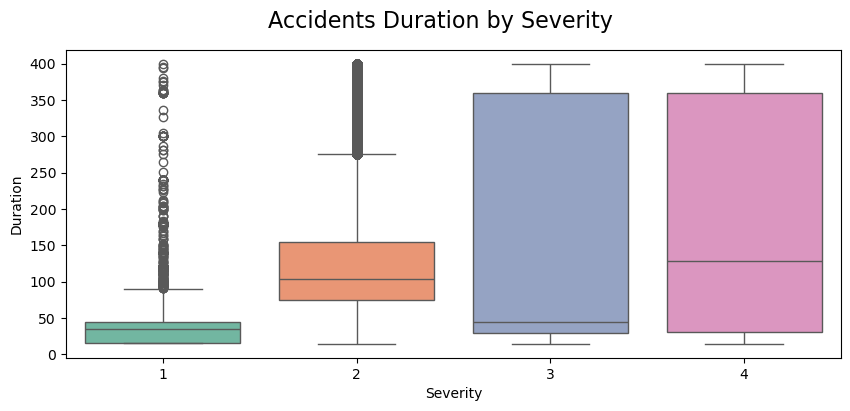

In [62]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration", data=accidents_df.loc[accidents_df['Duration'] < 400], palette="Set2", ax=ax)
plt.suptitle('Accidents Duration by Severity', fontsize=16)
plt.show()

* Higher Severity, Longer Durations: Severe accidents (levels 3 and 4) take longer to resolve due to investigations and injury treatment.
* Increased Variability: Severe accidents show inconsistent durations, influenced by incident scale or location.
* Outliers in Severity 1: Minor accidents occasionally face unexpected delays.
* Stability in Severity 2: Moderate accidents have consistent resolution times.
##### Implications:
* Traffic Management: Allocate resources efficiently for severe accidents.
* Emergency Response: Address outliers to minimize delays.
* Policy Planning: Guiding resource distribution based on severity.

**Accident Count by Year and Severity**

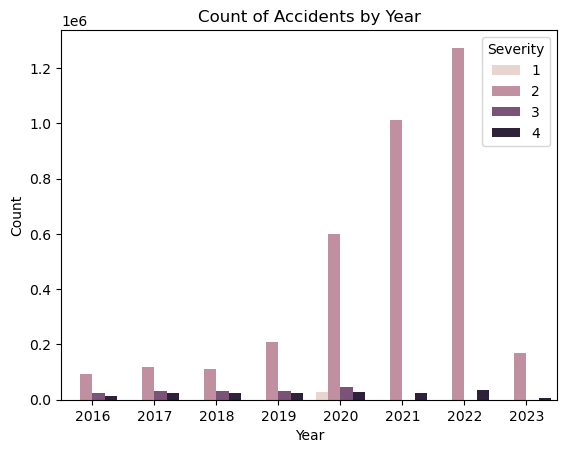

In [65]:
# Ensure data is sorted by Year
accidents_df['Year'] = pd.to_datetime(accidents_df['Start_Time']).dt.year
yearly_data = accidents_df.groupby(['Year', 'Severity']).size().reset_index(name='Count')
yearly_data = yearly_data.sort_values(by='Year')

# Plot again
sns.barplot(x='Year', y='Count', hue='Severity', data=yearly_data)
plt.title('Count of Accidents by Year')
plt.show()

* Severity Level 2 Dominates: Most accidents are moderate severity (level 2)
* Increasing Trend: Accident counts steadily rise from 2016 to 2022, peaking in 2022.
* Lower Frequency for Severe Levels: Levels 3 and 4 are infrequent, while level 1 has a slightly higher count.
##### Implications:
* Focus on Level 2: Efforts should target reducing moderate severity accidents.
* Traffic Safety: Strengthen accident prevention strategies to address rising cases.

**Heatmap of Severity by Hour and Clear Weather**

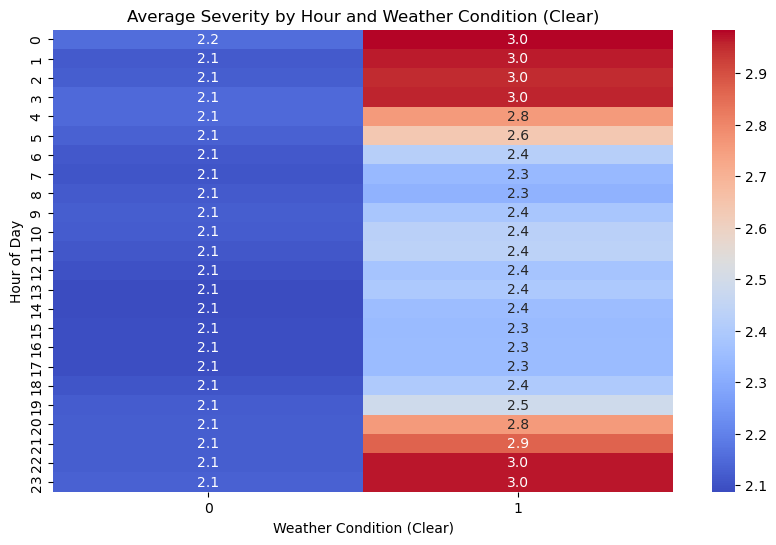

In [68]:
# Create a heatmap of average severity by hour and weather condition
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
heatmap_data = accidents_df.groupby(['Hour', 'Clear'])['Severity'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Severity by Hour and Weather Condition (Clear)')
plt.xlabel('Weather Condition (Clear)')
plt.ylabel('Hour of Day')
plt.show()

##### Nighttime Severity (00:00–06:00):
* Higher average severity (2.9–3.0) occurs at night, regardless of weather.
* Likely causes: poor visibility and impaired driving (e.g., fatigue or alcohol influence).
##### Daytime Severity (06:00–18:00):
* Lower severity (2.1–2.4) during working hours due to better visibility and lighter traffic.
##### Evening Severity (18:00–22:00):
* Slight increase (2.8–3.0), particularly in clear weather, likely due to rush-hour traffic and fatigue.
##### Weather Impact:
* Clear weather (1) sees slightly higher severity, potentially due to faster driving.

**Accident Frequency by State (Choropleth Map)**

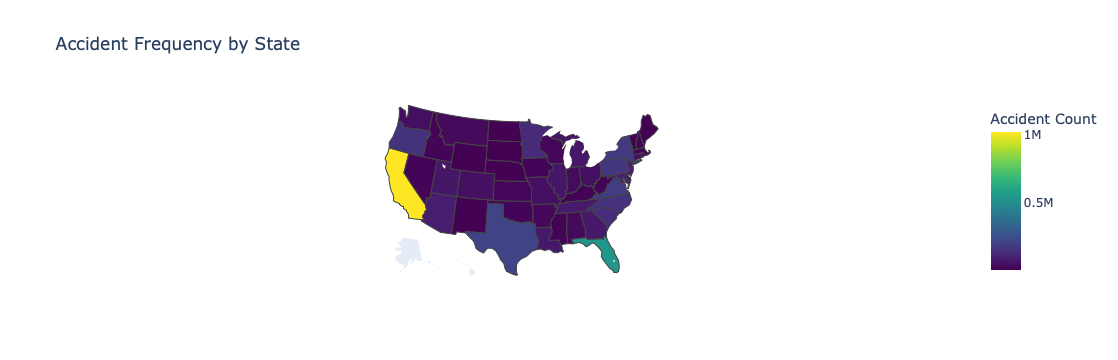

In [71]:
# Group accidents by state
state_accidents = accidents_df.groupby('State').size().reset_index(name='Accident Count')

# Plot a choropleth map
fig = px.choropleth(
    state_accidents,
    locations='State',
    locationmode="USA-states",
    color='Accident Count',
    scope="usa",
    color_continuous_scale="Viridis",
    title="Accident Frequency by State"
)
fig.show()

* High Accident Frequency:
States like California (in yellow) report the highest number of accidents, probably due to high population density, urbanization, and heavy flow of traffic.
* Moderate Frequency:
States like Florida (in green) show medium accident counts, influenced by similar factors on a smaller scale.
* Low Frequency:
Central less populated states in dark purple report the fewest accidents due to lower population density and traffic.

Conclusion:
Accident frequency increases with population density and urbanization; accident rates are higher in metropolitan states than in rural states.

**Accident Causes by State**

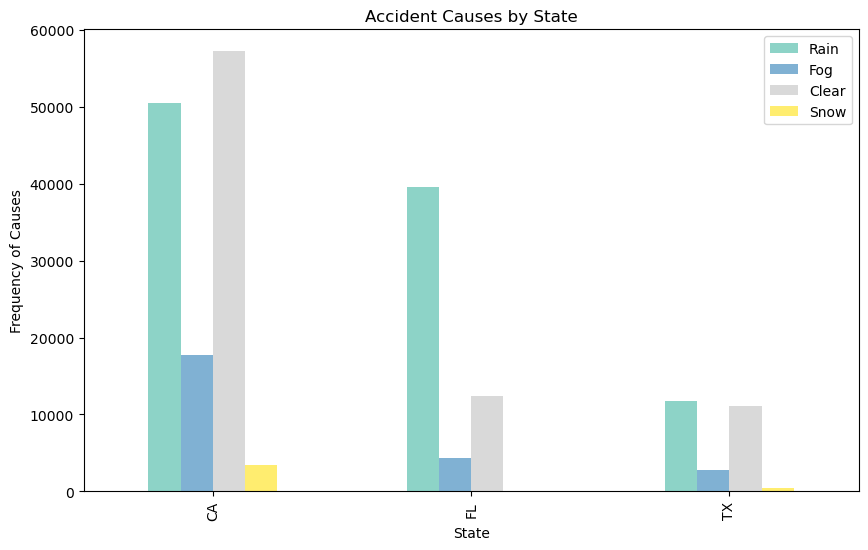

In [74]:
# Sample data for states
sample_states = ['CA', 'TX', 'FL']
causes = ['Rain', 'Fog', 'Clear', 'Snow']

# Group accident causes by state
regional_data = accidents_df[accidents_df['State'].isin(sample_states)].groupby(['State'])[causes].sum()

# Plot clustered bar chart for accident causes by state
regional_data.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title('Accident Causes by State')
plt.xlabel('State')
plt.ylabel('Frequency of Causes')
plt.show()

* Clear Weather: Most accidents in California, Florida, and Texas are due to driving at a higher speed despite good visibility.
* Rain: Second-highest contributor, with slippery roads and poor visibility as key factors.
* Fog and Snow: Very negligible, since snow in those states is almost negligible owing to their climatic nature.
##### Conclusion:
Clear weather is similarly fraught with a variety of hazards, making constant attention to safety a major imperative.

**Temporal Accident Trends (Yearly and Monthly)**

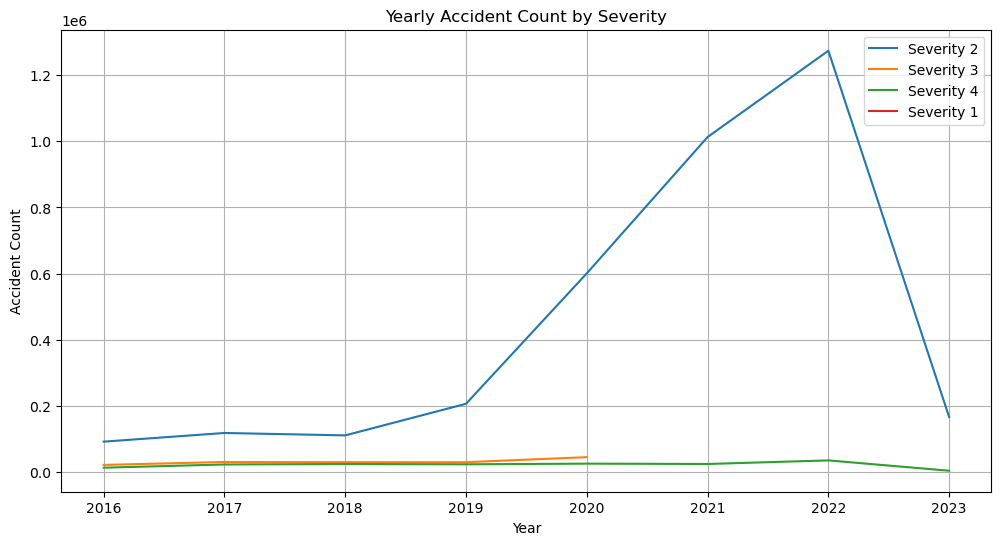

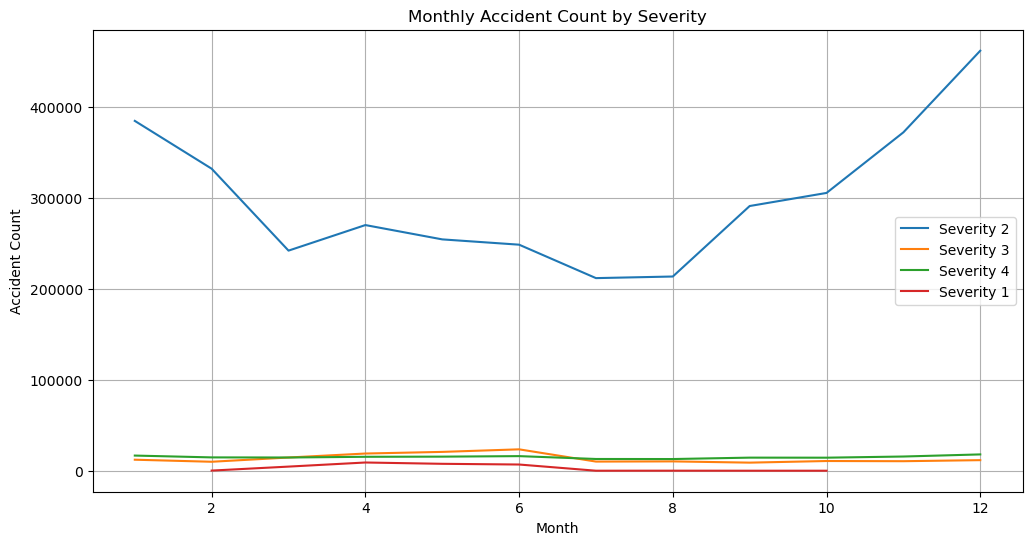

In [77]:
# Convert 'Start_Time' to datetime if it's not already
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])

# Extract year and month
accidents_df['Year'] = accidents_df['Start_Time'].dt.year
accidents_df['Month'] = accidents_df['Start_Time'].dt.month

# Group by year and severity, then count accidents
yearly_accidents = accidents_df.groupby(['Year', 'Severity']).size().reset_index(name='Accident Count')

# Create the line plot
plt.figure(figsize=(12, 6))
for severity in yearly_accidents['Severity'].unique():
    subset = yearly_accidents[yearly_accidents['Severity'] == severity]
    plt.plot(subset['Year'], subset['Accident Count'], label=f'Severity {severity}')

plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Yearly Accident Count by Severity')
plt.legend()
plt.grid(True)
plt.show()


# Group by month and severity, then count accidents
monthly_accidents = accidents_df.groupby(['Month', 'Severity']).size().reset_index(name='Accident Count')

# Create the line plot
plt.figure(figsize=(12, 6))
for severity in monthly_accidents['Severity'].unique():
    subset = monthly_accidents[monthly_accidents['Severity'] == severity]
    plt.plot(subset['Month'], subset['Accident Count'], label=f'Severity {severity}')

plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Monthly Accident Count by Severity')
plt.legend()
plt.grid(True)
plt.show()

#### Yearly Accident Count by Severity
* Severity 2:
Most frequent, peaking in 2022 with nearly 1 million incidents.
Sharp decline in 2023.
* Severity 3:
Consistently low, with a slight increase in the vicinity of 2021–2022.
* Severity 4:
Lowest frequency, with minimal change, showing a small rise from 2019 to 2021.

##### General Trends:
Severity 2 dominates: Moderate accidents are far more common than minor or severe ones.
Upward Trend Until 2022: Overall increase in accidents suggests worsening traffic or improved reporting.

#### Monthly Accident Count by Severity:

* Severity 2: Highest frequency, peaking in December, probably because of winter conditions and holiday travel. A dip occurs during the summer months, possibly due to better weather.
* Severity 3: Fairly constant throughout the year, with a slight increase toward the end of the year, following a similar seasonal trend as Severity 2 but on a smaller scale.
* Severity 4: Least frequent, with a flat trend indicating rare occurrences.
* Severity 1: Low count with minimal fluctuation, similar to Severity 4.

##### Key Insights:

Seasonality: Severity 2 accidents show significant seasonality, with higher counts in colder months (especially December) and lower counts in summer.
Stability: Severity 1, 3, and 4 remain stable year-round, suggesting they are less impacted by seasonal factors.

**Heatmap - Hour of Day vs. Weekday**

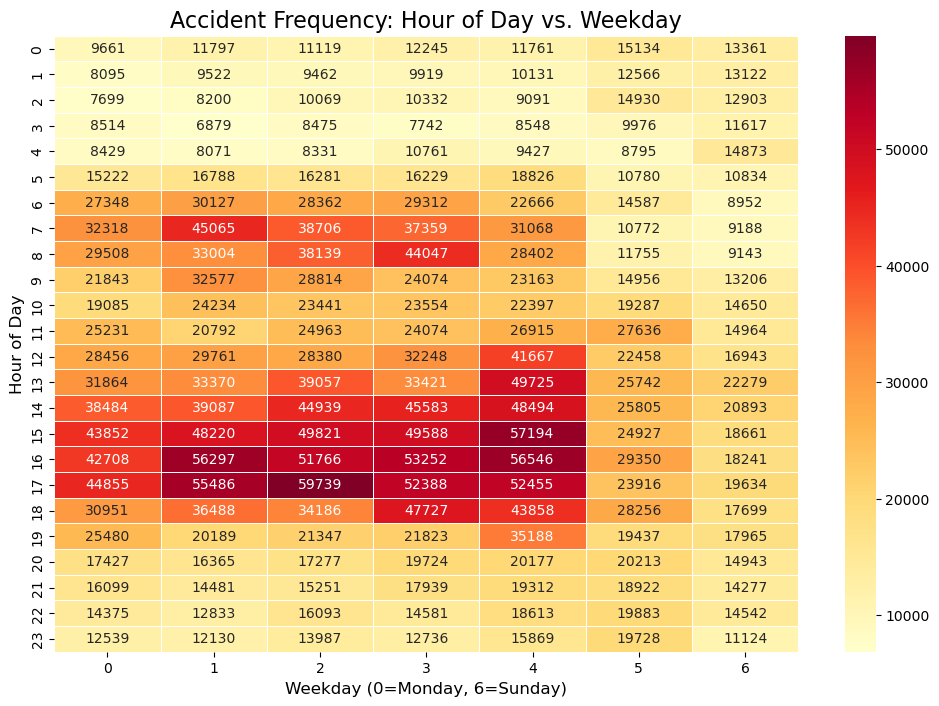

In [81]:
# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap_data = accidents_df.groupby(['Hour', 'Weekday'])['Severity'].count().unstack()
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5) # Use a perceptually uniform colormap
plt.title('Accident Frequency: Hour of Day vs. Weekday', fontsize=16)
plt.xlabel('Weekday (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.show()

* Dark red represents high accident frequency (50,000+), light yellow represents low (<10,000).
##### Patterns:
* Peak: Highest accidents between 4 PM and 7 PM on weekdays (rush hour).
* Low Frequency: early morning (12 AM - 5 AM) and late night, after 8 PM.
* Weekend Variation: More accidents are late in the evening, probably due to social activities.
* Key Insight: The most critical time of day is rush hour, with weekends peaking later.

**Top Cities by Accident Count**

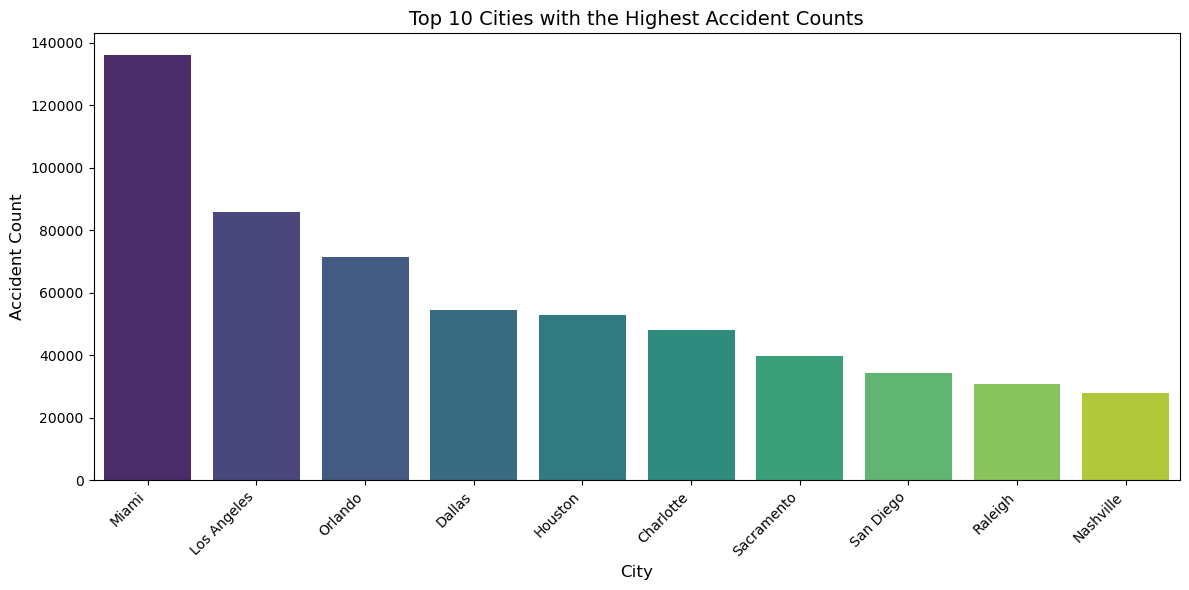

In [84]:
# Group by city and count accidents
city_accidents = accidents_df.groupby('City')['Severity'].count().reset_index(name='Accident Count')

# Sort by accident count in descending order and get the top 10
top_10_cities = city_accidents.sort_values(by='Accident Count', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='City', y='Accident Count', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities with the Highest Accident Counts', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Miami has the highest accident count, surpassing 120,000 incidents.
* Accidents in Los Angeles and Orlando rank second and third with more than 80,000 and 70,000, respectively.
* Cities like Dallas, Houston, and Charlotte form the middle tier, with similar counts of accidents.
* Sacramento, San Diego, Raleigh, and Minneapolis have accident counts between 30,000 and 50,000, placing them in the lower range of the top 10.

**Weather Impact on Accident Severity**

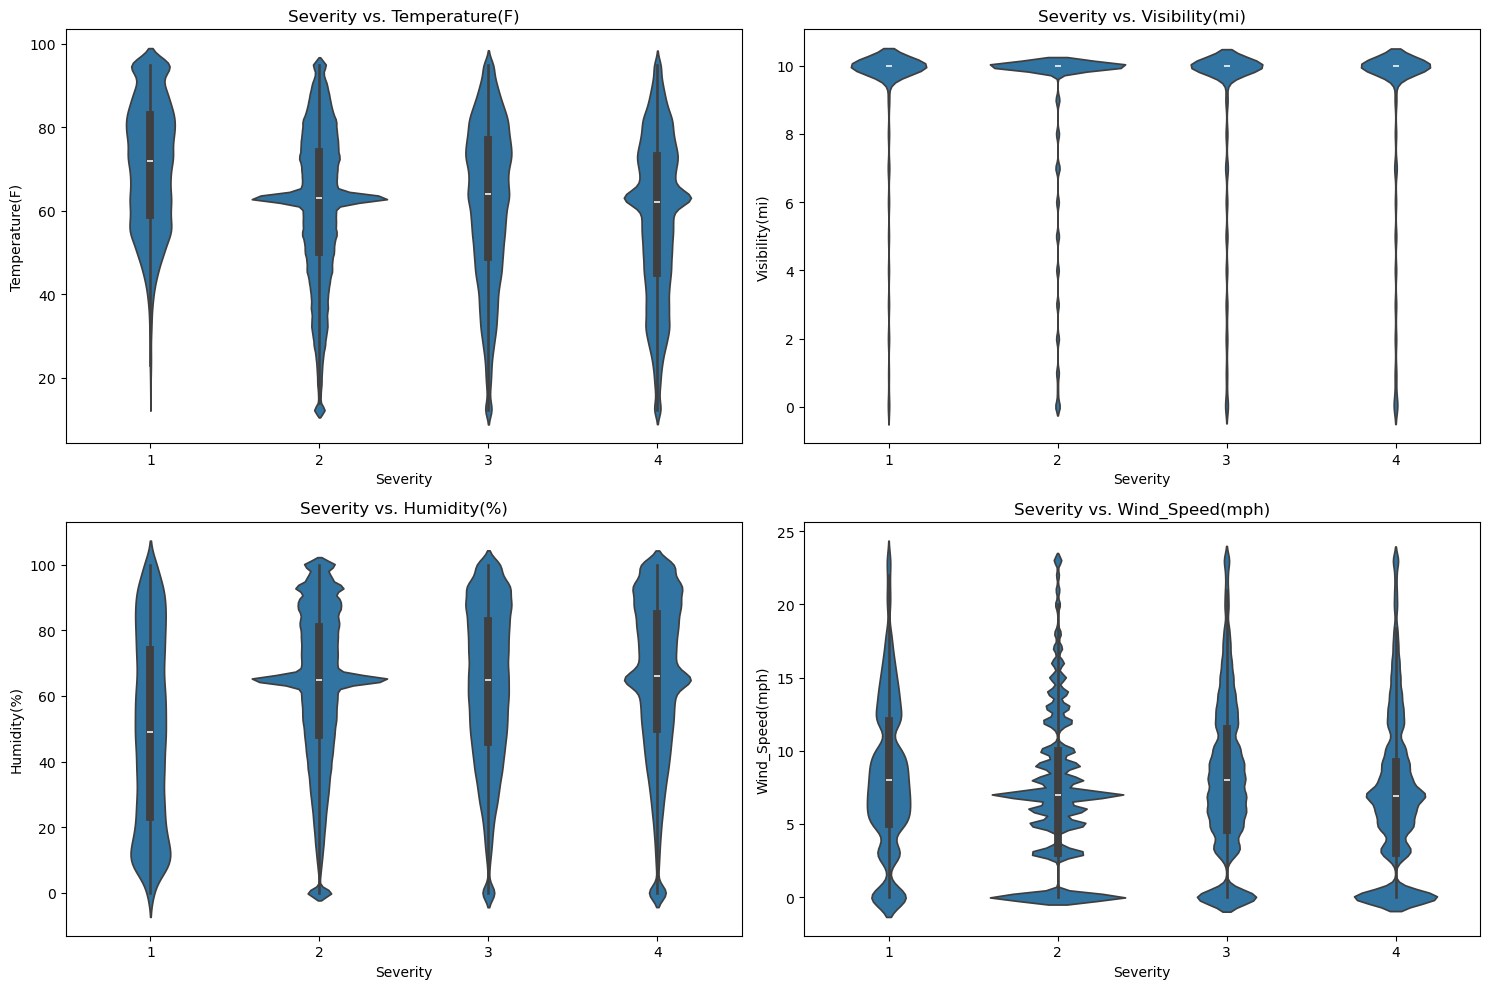

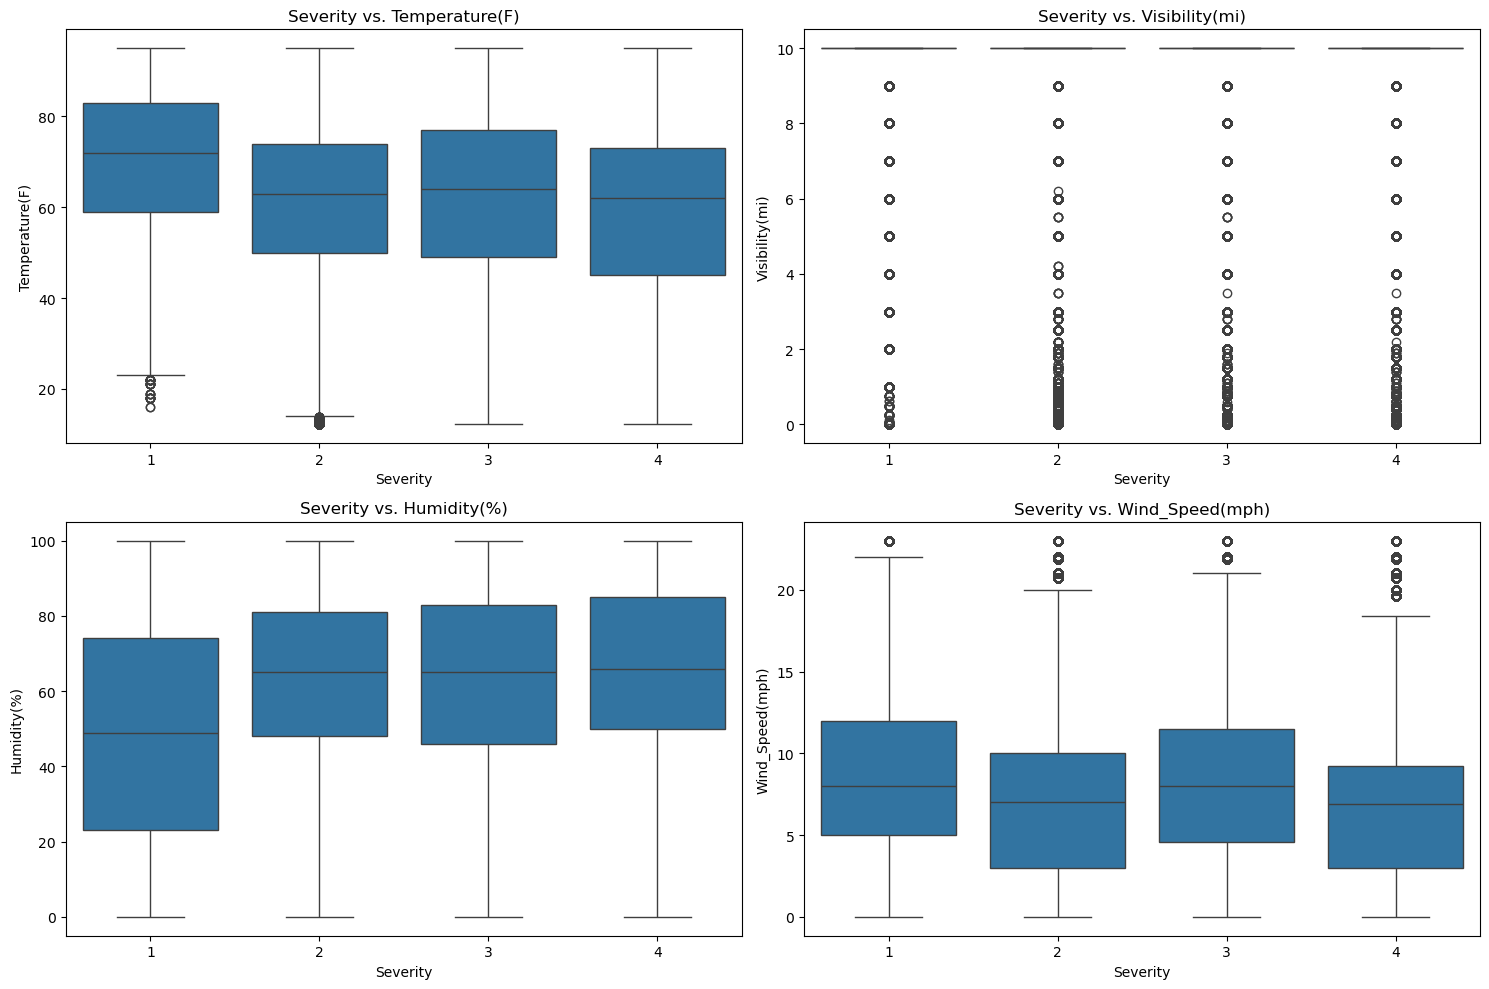

In [87]:
# List of features to plot against Severity
features = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Iterate through features and create violin plots
for i, feature in enumerate(features):
    sns.violinplot(x='Severity', y=feature, data=accidents_df, ax=axes[i])
    axes[i].set_title(f'Severity vs. {feature}')
plt.tight_layout()
plt.show()

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Iterate through features and create box plots
for i, feature in enumerate(features):
    sns.boxplot(x='Severity', y=feature, data=accidents_df, ax=axes[i])
    axes[i].set_title(f'Severity vs. {feature}')
plt.tight_layout()
plt.show()

* Severity vs. Temperature:
The majority of incidents occur within 50–80°F. Severe incidents occur within moderate temperatures since there are a lot of traffic/activities.
* Severity vs. Visibility:
Accidents peak at 10 miles visibility, but high-severity incidents (3 and 4) have a greater presence in low visibility; that is, poor visibility promotes severity.
* Severity vs. Humidity:
The highest severity accidents are focused around high humidity (>70%) and are usually associated with rain or storms, whereas the lowest severity happens along all ranges of humidity levels.
* Severity vs. Wind Speed:
More severe incidents occur at lower wind speeds (<15 mph); higher winds may reduce the number of incidents, possibly because people stay indoors.

**Weather Conditions and Accident Counts**

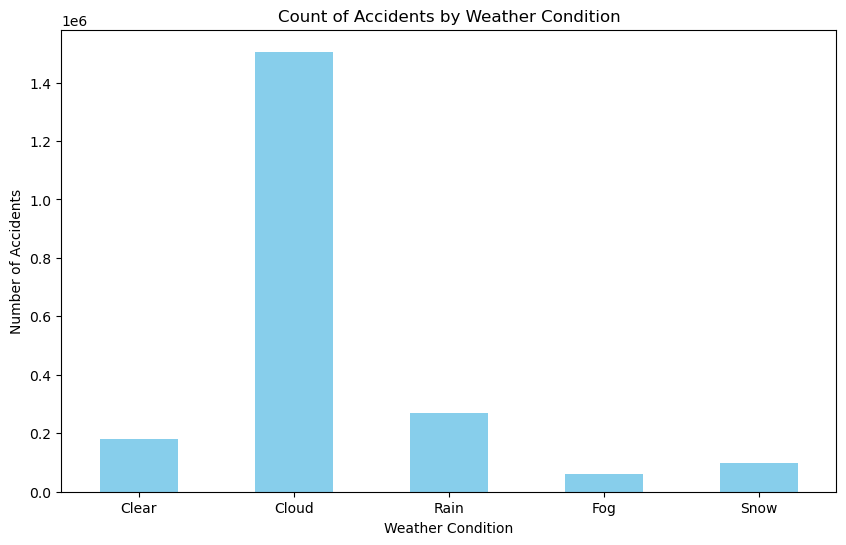

In [90]:
# Count accidents for each weather condition
weather_counts = accidents_df[['Clear', 'Cloud', 'Rain', 'Fog', 'Snow']].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

* Cloudy Weather: Most accidents (1.4 million) occurred in cloudy conditions, possibly due to underestimated risks from reduced visibility.
* Clear Weather: Accidents in clear weather were fewer, suggesting that good weather doesn't eliminate risk, likely due to human errors or road conditions.
* Rain and Snow: Accidents in these conditions are lower but still significant, as slippery roads and poor visibility increase hazard.
* Fog: The least frequent cause of accidents, likely due to its rarity and drivers exercising more caution.

**Major Roads and Accident Frequency**

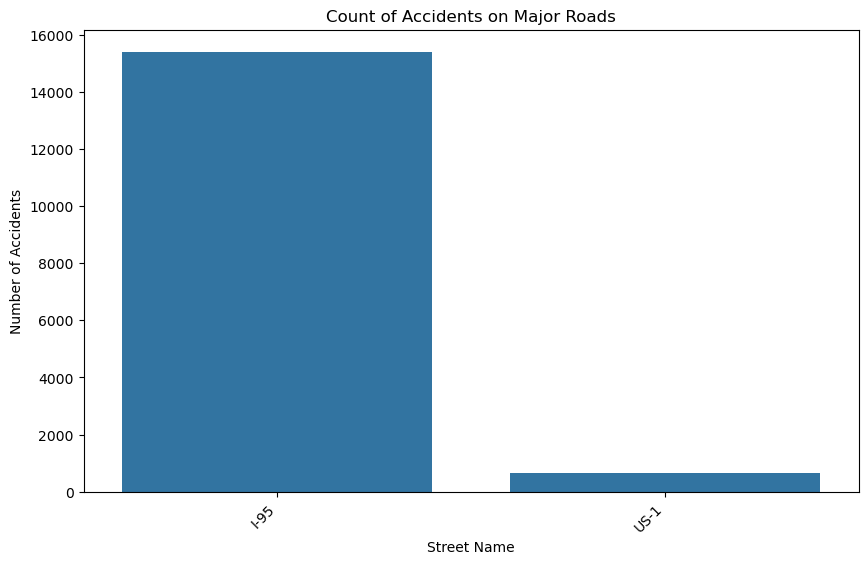

In [93]:
# Define major roads
major_roads = ['I-95', 'US-1']

# Filter data for major roads
major_road_accidents = accidents_df[accidents_df['Street'].isin(major_roads)]

# Count accidents for each major road
street_counts = major_road_accidents['Street'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=street_counts.index, y=street_counts.values)
plt.title('Count of Accidents on Major Roads')
plt.xlabel('Street Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

* I-95: With an estimated 15,000 crashes, the highest number occurred along I-95. This could be due to the high traffic volume and speed, thus requiring specific safety measures.
* US-1: Fewer accidents were recorded on US-1, which could be attributed to lower traffic volume, road design, or slower speeds.
* Insight: Accident counts clearly reflect road type and traffic usage. Higher incidents associated with I-95 point towards the need for enhanced safety on high-speed, high-traffic routes, with lower counts of US-1 reflecting different traffic use.

**Cluster Analysis of Accidents**

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)', 'Precipitation(in)']
X = accidents_df[features]

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
accidents_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
print(accidents_df.groupby('Cluster')[features].mean())

         Severity  Temperature(F)  Visibility(mi)  Humidity(%)  \
Cluster                                                          
0        2.007886       45.344165        6.956232    77.815486   
1        1.990650       69.259790        9.881957    54.592707   
2        3.552307       60.829983        9.040342    62.960181   

         Wind_Speed(mph)  Precipitation(in)  
Cluster                                      
0               4.970476           0.014127  
1               8.155196           0.001496  
2               7.423737           0.004101  


* Cluster 0: This cluster shows moderate severity accidents (mean severity ~2.01) with higher visibility and humidity levels (77.82%). Minimal precipitation and lower wind speed suggest mild weather conditions.

* Cluster 1: Accidents in this cluster have slightly lower severity (mean severity ~1.99), warmer temperatures, and moderate visibility. Higher wind speeds (8.16 mph) indicate a mix of stable or windy conditions.

* Cluster 2: This cluster includes higher severity accidents (mean severity ~3.55) under intermediate temperature and visibility conditions. Wind speed is around 7.42 mph, with moderate humidity levels (62.96%).

#### Insight: 
Clusters highlight the relationship between environmental factors and accident severity. Higher severity in Cluster 2 suggests the need for targeted safety measures in specific weather conditions.

**Sunrise/Sunset and Accident Counts**

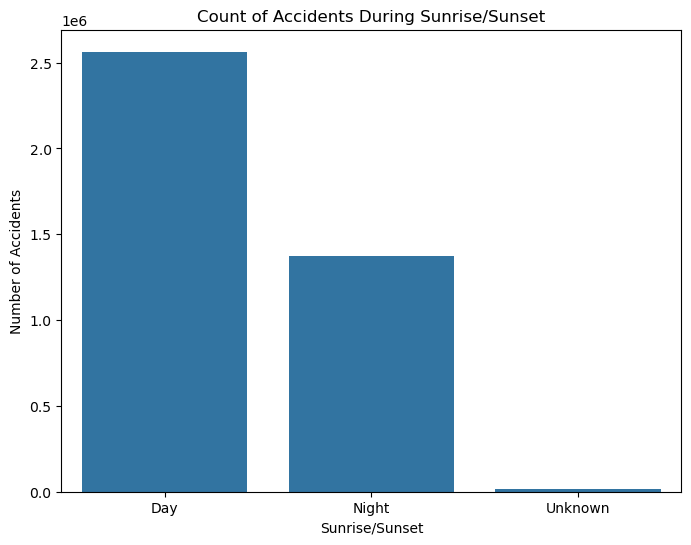

In [99]:
# Count accidents by sunrise/sunset categories
sunrise_sunset_counts = accidents_df['Sunrise_Sunset'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sunrise_sunset_counts.index, y=sunrise_sunset_counts.values)
plt.title('Count of Accidents During Sunrise/Sunset')
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Number of Accidents')
plt.show()

* Day: The "Day" period has significantly higher accident counts, with over 2 million incidents.
* Night: Fewer accidents occur at night.
* Insight: The data reveals that accidents are much more frequent during the day compared to the night.

**Correlation Analysis of Numerical Features**

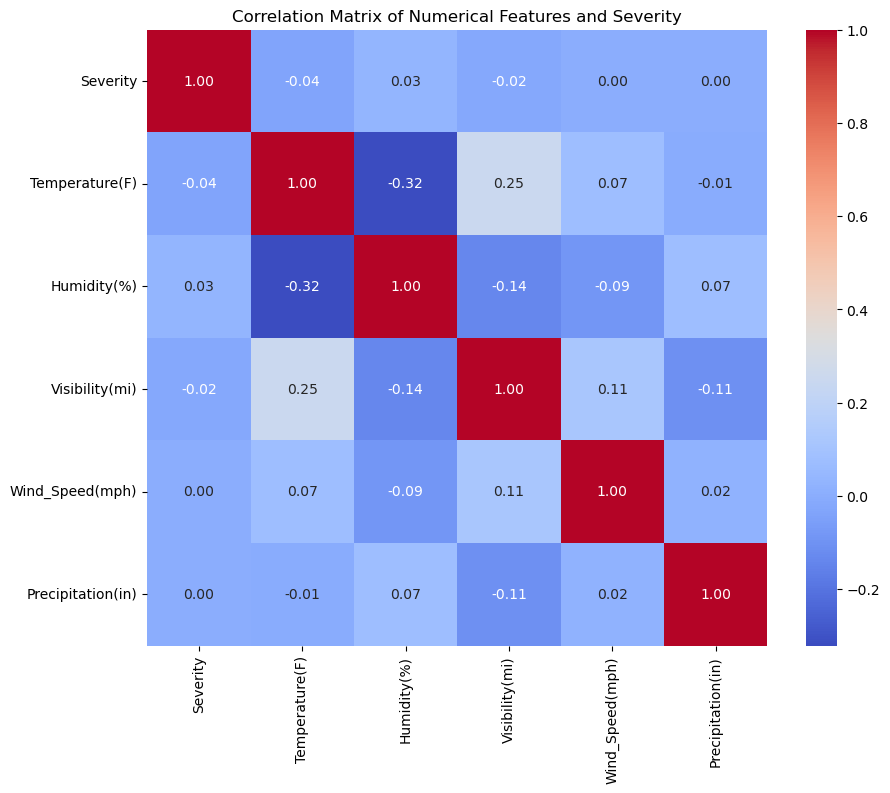

In [102]:
# Select numerical features
numerical_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
numerical_df = accidents_df[numerical_features]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Severity')
plt.show()

The correlation matrix heatmap shows the relationship of accident severity with environmental features:
##### Severity Correlations:
* Very slight negative correlation with temperature (-0.04) and very slight positive correlation with humidity (0.04).
* No correlation with visibility, wind speed, or precipitation.
##### Environmental Feature Correlations:
* Temperature and humidity are moderately negatively correlated at -0.32.
* Temperature and visibility positively and moderately correlate at 0.25.
* Humidity is negatively correlated with visibility, -0.14.
* Wind speed and precipitation mostly hold pretty weak correlations with other variables.
##### Key Insight:
Environmental factors weakly correlate with accident severity, with stronger correlations observed between weather conditions themselves.

**Boxplot - Distance by Severity**

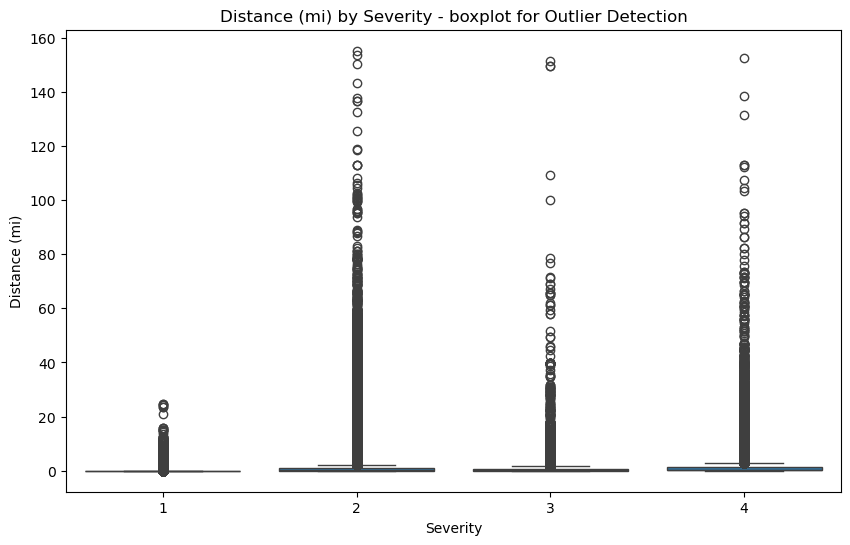

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Distance(mi)', data=accidents_df)
plt.title('Distance (mi) by Severity - boxplot for Outlier Detection')
plt.xlabel('Severity')
plt.ylabel('Distance (mi)')
plt.show()

This boxplot shows the distribution of distance (mi) by incident severity (1 to 4):

* Severity 1: Shortest distances with low variability and few outliers.
* Severities 2–4: Increased variability in distances with outliers over 100 miles.
* Outliers: Large distances, in particular for higher severities, indicate extraordinary cases. Examples include detours or major incidents.
Higher severities tend to involve longer distances, but overlap in variability suggests other influencing factors.


<a id="full-model-implementation-analysis-hypothesis-testing-and-ml"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Full Model Implementation: Analysis, Hypothesis Testing and ML</h2></center>

In this section, we will define the hypothesis and set the target variable based on insights from the EDA. We will implement and evaluate machine learning algorithms, including Logistic Regression, Random Forest, and Gradient Boosting, to predict accident severity. Features like temperature, wind speed, humidity, and visibility will be preprocessed using scaling and encoding techniques to ensure consistency. Multicollinearity among features will be addressed by calculating Variance Inflation Factors (VIF), and key predictors influencing accident severity will be identified through feature importance analysis. The models will be evaluated using metrics such as accuracy and ROC-AUC scores, and insights will be drawn from visualizations like feature importance. These steps will enable us to thoroughly analyze and select the most effective model for predicting accident severity.

**Hypothesis:**

We hypothesize that environmental factors (e.g., weather conditions like fog, rain, and temperature), temporal factors (e.g., time of day, day of the week), and location-specific characteristics significantly influence the severity of road accidents. By analyzing these factors, we aim to develop a model that predicts accident severity accurately and identifies high-risk conditions and times for targeted interventions.

**Target Variable**

The target variable in this project is Severity, which categorizes the level of seriousness of an accident. It is an ordinal variable with the following levels:

- 1 - Minor severity (minimal impact).
- 2 - Moderate severity (some disruptions and injuries).
- 3 - Severe accidents (significant injuries and delays).
- 4 - Very severe accidents (critical injuries or fatalities).

The objective is to predict this target variable based on the features derived from environmental, temporal, and geographical factors.

In [113]:
# Import libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score

We selected some features based on domain knowledge, focusing on weather and time-related factors like visibility, precipitation, and traffic patterns, which directly influence accident severity. During preprocessing, we derived these features by encoding weather conditions and extracting time components, ensuring they were clean and ready for modeling. This preselection helped avoid high dimensionality and ensured consistency across models, making the analysis more focused and efficient.

In [115]:
# Features and target variable
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Hour', 'Weekday', 'Clear',
            'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']
target = 'Severity'

# Encode categorical features
label_encoders = {}
for col in features:
    if accidents_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(accidents_df[col]):
        le = LabelEncoder()
        accidents_df[col] = le.fit_transform(accidents_df[col])
        label_encoders[col] = le

# Ensure binary columns are integers
binary_columns = ['Clear', 'Rain', 'Snow', 'Cloud', 'Heavy_Rain', 'Heavy_Snow', 'Fog']
for col in binary_columns:
    accidents_df[col] = accidents_df[col].astype(int)

# Split the data into training and testing sets
X = accidents_df[features]
y = accidents_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: Scale numerical columns
columns_to_scale = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'
)

**Evaluating base models**

We evaluated Logistic Regression, Random Forest, and Gradient Boosting to predict accident severity. Logistic Regression served as a baseline model, providing interpretability but struggling with class imbalance and non-linear relationships. Random Forest performed significantly better, effectively capturing complex patterns and providing more accurate predictions across all classes. Gradient Boosting showed competitive performance but was more computationally intensive, making Random Forest the most suitable choice for balancing accuracy, efficiency, and robustness.

***Logistic Regression***

In [119]:
# Logistic Regression Pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Logistic Regression ROC-AUC
logreg_y_pred_proba = logreg.predict_proba(X_test)
print("\nLogistic Regression ROC-AUC Score (multiclass):")
print(roc_auc_score(y_test, logreg_y_pred_proba, multi_class='ovr'))

Logistic Regression Accuracy: 0.9065230965243353

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5689
           2       0.91      1.00      0.95    717203
           3       0.00      0.00      0.00     32188
           4       0.00      0.00      0.00     36078

    accuracy                           0.91    791158
   macro avg       0.23      0.25      0.24    791158
weighted avg       0.82      0.91      0.86    791158


Logistic Regression ROC-AUC Score (multiclass):
0.6658056735084277


The model achieved high accuracy (90.65%), largely dominated by the majority class (2), but this is misleading due to the class imbalance in the dataset. Its performance on minority classes (1, 3, and 4) was poor, with precision, recall, and F1-scores of 0.00, as the model predominantly predicted the majority class. The low macro averages and ROC-AUC score of 0.66 further indicate that the model struggles to distinguish between the minority classes, highlighting its limitations in handling imbalanced data.

***Random Forest Classifier***

In [122]:
# Random Forest Pipeline
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Random Forest
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Random Forest ROC-AUC
rf_y_pred_proba = rf_classifier.predict_proba(X_test)
print("\nRandom Forest ROC-AUC Score (multiclass):")
print(roc_auc_score(y_test, rf_y_pred_proba, multi_class='ovr'))

Random Forest Classifier Accuracy: 0.9144785238852416

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.32      0.42      5689
           2       0.93      0.98      0.96    717203
           3       0.56      0.22      0.32     32188
           4       0.55      0.28      0.37     36078

    accuracy                           0.91    791158
   macro avg       0.66      0.45      0.52    791158
weighted avg       0.90      0.91      0.90    791158


Random Forest ROC-AUC Score (multiclass):
0.8125326129211806


The Random Forest Classifier achieved an accuracy of 91.45%, demonstrating strong performance, particularly on the dominant class (2). The classification report indicates high precision, recall, and F1-scores for class 2, while the minority classes (1, 3, and 4) show moderate performance, with F1-scores ranging from 0.32 to 0.42. The macro average scores are lower due to the imbalance in class representation, but the weighted averages remain high, reflecting the model's ability to prioritize overall accuracy. The ROC-AUC score of 0.81 highlights the model’s capability to effectively separate classes, making it suitable for handling complex patterns and imbalanced datasets. Additionally, its robustness in capturing important features and providing balanced predictions across the majority and minority classes makes it a reliable choice for this task.

***Gradient Boosting Regressor***

In [125]:
# Gradient Boosting Pipeline
gb_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Gradient Boosting
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Gradient Boosting ROC-AUC
gb_y_pred_proba = gb_classifier.predict_proba(X_test)
print("\nGradient Boosting ROC-AUC Score (multiclass):")
print(roc_auc_score(y_test, gb_y_pred_proba, multi_class='ovr'))

Gradient Boosting Classifier Accuracy: 0.9066709810176982

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5689
           2       0.91      1.00      0.95    717203
           3       0.40      0.00      0.00     32188
           4       0.41      0.01      0.03     36078

    accuracy                           0.91    791158
   macro avg       0.43      0.25      0.25    791158
weighted avg       0.86      0.91      0.86    791158


Gradient Boosting ROC-AUC Score (multiclass):
0.7327599981563158


The Gradient Boosting Classifier achieved an accuracy of 90.67%, with strong performance on the dominant class (2) but limited effectiveness on minority classes (1, 3, and 4). The classification report highlights high precision, recall, and F1-scores for class 2, while other classes show low scores, significantly lowering the macro average metrics. The weighted averages remain relatively high due to the influence of the majority class. The ROC-AUC score of 0.73 indicates moderate ability to distinguish between classes, demonstrating that while Gradient Boosting captures some patterns effectively, it struggles with the imbalanced nature of the dataset.

**Addressing Model Assumptions**

In [128]:
# Multicollinearity Check using Variance Inflation Factor (VIF)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(accidents_df[features])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
    VIF Factor         features
0    49.366884            const
1     1.243968   Temperature(F)
2     1.393198      Humidity(%)
3     1.534789   Visibility(mi)
4     1.107592  Wind_Speed(mph)
5     1.066929             Hour
6     1.003458          Weekday
7     1.054662            Clear
8     1.252890            Cloud
9     1.431054             Rain
10    1.112817       Heavy_Rain
11    1.368282             Snow
12    1.043815       Heavy_Snow
13    1.219973              Fog


##### Interpretation:
If VIF factors are below 4, it suggests no severe multicollinearity among the variables.

**Final Model Evaluation**

***Random Forest feature importance***

We chose Random Forest as the final model because it performed the best in terms of accuracy and ROC-AUC, handled multicollinearity effectively, and provided valuable insights into feature importance. Additionally, its ability to capture non-linear relationships and robustness to correlated features made it the most suitable choice for our dataset.

In [133]:
rf_feature_importances = rf_classifier.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importances})
print("Feature Importances from Random Forest:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances from Random Forest:
            Feature  Importance
0    Temperature(F)    0.296418
1       Humidity(%)    0.253185
4              Hour    0.154243
3   Wind_Speed(mph)    0.146002
5           Weekday    0.081014
2    Visibility(mi)    0.035729
6             Clear    0.025491
7             Cloud    0.004785
8              Rain    0.001383
9        Heavy_Rain    0.000610
10             Snow    0.000540
12              Fog    0.000471
11       Heavy_Snow    0.000129


The Random Forest feature importance shows **Temperature**, **Humidity**, and **Hour** as the most influential factors, followed by **Wind Speed** and **Weekday**. Weather-related features like **Rain** and **Snow** have minimal impact, highlighting the dominance of environmental and temporal factors in predicting accident severity.

**One vs Rest (OvR) ROC curve:**

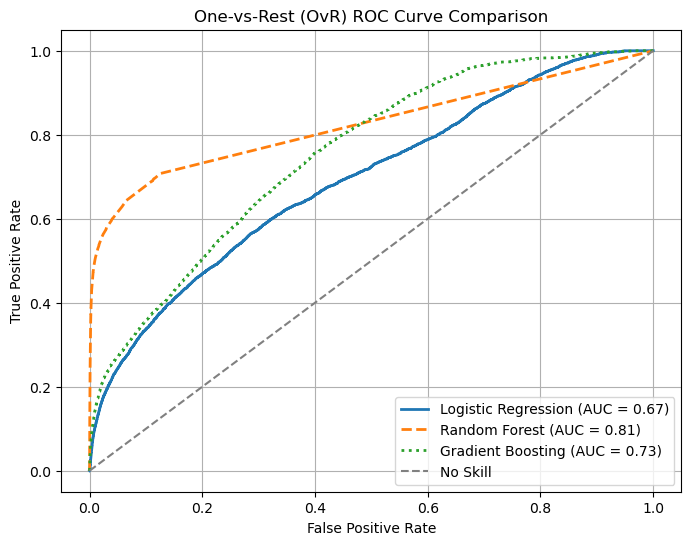

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the true labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))
n_classes = y_test_bin.shape[1]

# Initialize dictionaries for averaged FPR/TPR
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Logistic Regression
logreg_probs = logreg.predict_proba(X_test)
for i in range(n_classes):
    fpr_dict[f"logreg_{i}"], tpr_dict[f"logreg_{i}"], _ = roc_curve(y_test_bin[:, i], logreg_probs[:, i])
roc_auc_logreg = roc_auc_score(y_test, logreg_probs, multi_class='ovr')

# Random Forest
rf_probs = rf_classifier.predict_proba(X_test)
for i in range(n_classes):
    fpr_dict[f"rf_{i}"], tpr_dict[f"rf_{i}"], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
roc_auc_rf = roc_auc_score(y_test, rf_probs, multi_class='ovr')

# Gradient Boosting
gb_probs = gb_classifier.predict_proba(X_test)
for i in range(n_classes):
    fpr_dict[f"gb_{i}"], tpr_dict[f"gb_{i}"], _ = roc_curve(y_test_bin[:, i], gb_probs[:, i])
roc_auc_gb = roc_auc_score(y_test, gb_probs, multi_class='ovr')

# Plot ROC curves for models
plt.figure(figsize=(8, 6))
plt.plot(fpr_dict['logreg_0'], tpr_dict['logreg_0'], lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dict['rf_0'], tpr_dict['rf_0'], lw=2, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dict['gb_0'], tpr_dict['gb_0'], lw=2, linestyle=':', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Add labels, title, and legend
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest (OvR) ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The graph compares the ROC performance of Logistic Regression, Random Forest, and Gradient Boosting models. Random Forest, with the highest AUC (0.81), demonstrates superior class separation, followed by Gradient Boosting (AUC = 0.73). Logistic Regression performs the worst (AUC = 0.67), struggling to distinguish between classes. The diagonal line represents random guessing (AUC = 0.5).

**Feature Importance Visualization**

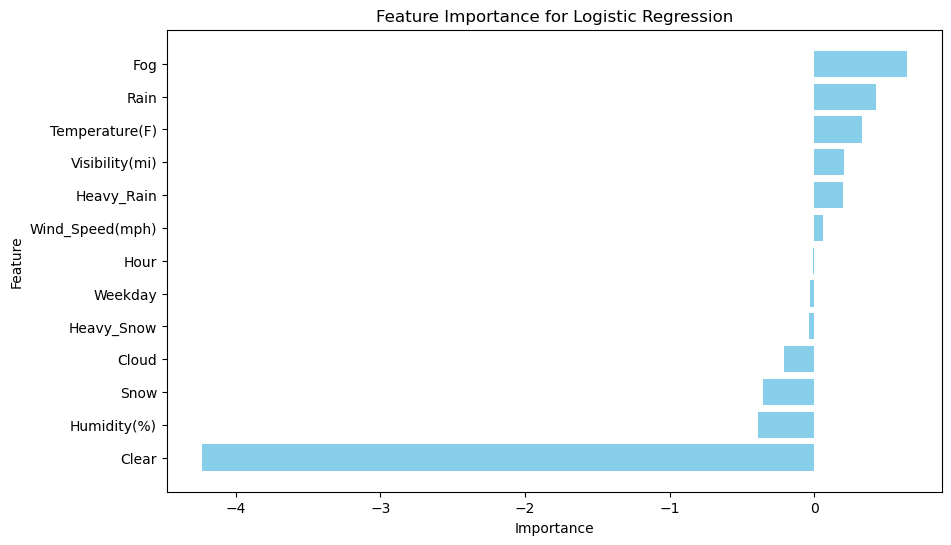

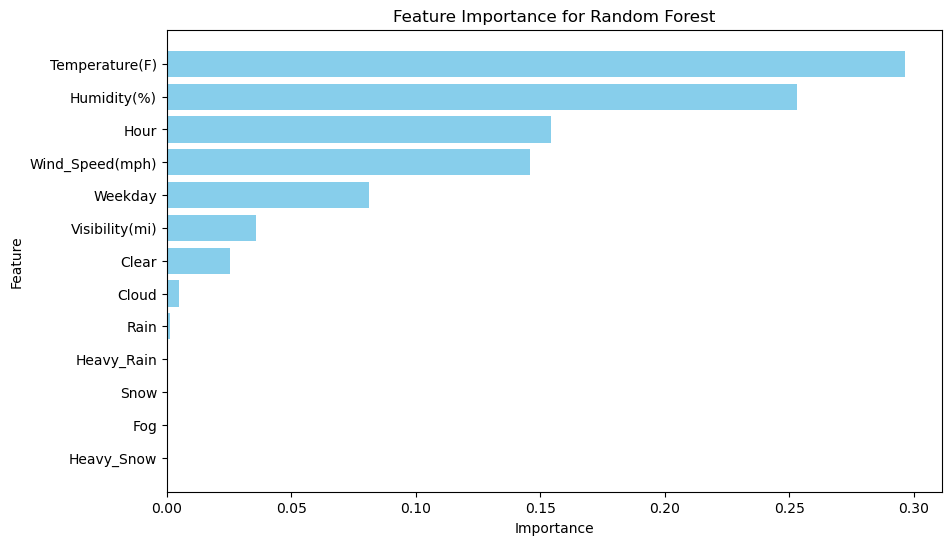

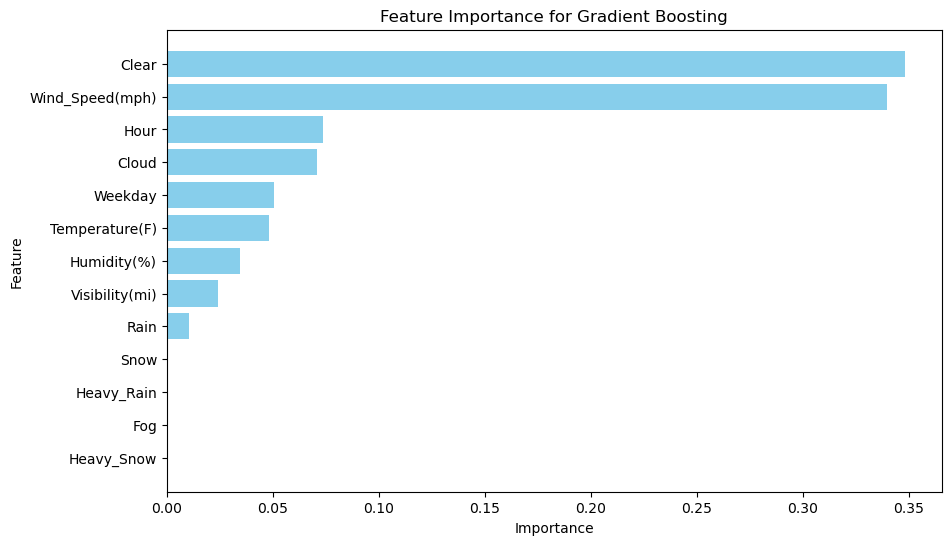

In [139]:
def plot_feature_importance(model, model_name, X):
    """
    Plots the feature importances or coefficients for a given model.

    Parameters:
    - model: Trained model (e.g., LogisticRegression, RandomForest, GradientBoosting).
    - model_name: Name of the model (String), used for the plot title.
    - X: Feature dataset (usually the training set).
    """
    if hasattr(model, 'feature_importances_'):  # Tree-based models
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  # Logistic Regression
        feature_importances = model.coef_[0]
    else:
        raise ValueError(f"Model {model_name} does not have feature importances or coefficients.")

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()

# Visualize feature importance for each model
plot_feature_importance(logreg.named_steps['classifier'], 'Logistic Regression', X_train)
plot_feature_importance(rf_classifier.named_steps['classifier'], 'Random Forest', X_train)
plot_feature_importance(gb_classifier.named_steps['classifier'], 'Gradient Boosting', X_train)

##### Feature Importance for Logistic Regression

Logistic Regression shows that weather conditions like Fog, Rain, and Temperature strongly influence the predicted outcome, while Clear weather has a significant negative impact. Features such as Cloud, Weekday, and Snow have minimal importance. Overall, weather is a key predictor, while temporal factors like Hour and Weekday play a lesser role.

##### Feature Importance of Random Forest

Temperature, Humidity, and Wind Speed are the most influential predictors, while features like Visibility, Clear, and weather conditions such as Snow and Fog have minimal impact. Time-based features like Hour and Weekday contribute moderately. Low importance of factors like Heavy Snow and Rain suggests weak correlations with the target outcome.

##### Feature Importance of Gradient Boosting

Clear and Wind Speed are the most influential features, strongly impacting model predictions, followed by Hour and Cloud, which highlight the importance of weather and time. Features like Weekday, Temperature, and Humidity contribute moderately, while Visibility, Rain, Snow, and Heavy Weather conditions have low or negligible importance. This suggests the model relies on weather and time factors, with less emphasis on less frequent conditions.he target.

**Model Improvement Using Selected Features**

Model Improvement using selected features focuses on retraining models with a refined subset of features to reduce complexity and improve interpretability. By selecting only the most impactful features (e.g., temperature, humidity, wind speed, hour, and weekday), the models become more efficient. While accuracy may slightly decrease, this trade-off ensures better generalization, faster computation, and a focus on the most relevant predictors for accident severity.

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df is already loaded
# Select features and target
features = ['Temperature(F)', 'Wind_Speed(mph)', 'Humidity(%)', 'Hour', 'Weekday']  # Added 'Weekday' here
target = 'Severity'

# Prepare data for training
X = accidents_df[features]
y = accidents_df[target]

# Drop rows with any missing values in X or y to ensure consistency
accidents_df = accidents_df.dropna(subset=features + [target])

X = accidents_df[features]
y = accidents_df[target]

# Convert categorical 'Weekday' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
X['Weekday'] = label_encoder.fit_transform(X['Weekday'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (if any remain)
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Feature Scaling (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Logistic Regression with selected features
logreg.fit(X_train_scaled, y_train)
accuracy_logreg = accuracy_score(y_test, logreg.predict(X_test_scaled))
print(f"Logistic Regression Accuracy (selected features): {accuracy_logreg}")
logreg_predictions = logreg.predict(X_test_scaled)
logreg_probs = logreg.predict_proba(X_test_scaled)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

roc_auc_logreg = roc_auc_score(y_test, logreg_probs, multi_class='ovr')
print(f"Logistic Regression ROC-AUC Score: {roc_auc_logreg:.4f}")

# Random Forest with selected features
rf_classifier.fit(X_train_scaled, y_train)
accuracy_rf = accuracy_score(y_test, rf_classifier.predict(X_test_scaled))
print(f"Random Forest Accuracy (selected features): {accuracy_rf}")
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_probs = rf_classifier.predict_proba(X_test_scaled)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

roc_auc_rf = roc_auc_score(y_test, rf_probs, multi_class='ovr')
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")


# Gradient Boosting with selected features
gb_classifier.fit(X_train_scaled, y_train)
accuracy_gb = accuracy_score(y_test, gb_classifier.predict(X_test_scaled))
print(f"Gradient Boosting Accuracy (selected features): {accuracy_gb}")
gb_predictions = gb_classifier.predict(X_test_scaled)
gb_probs = gb_classifier.predict_proba(X_test_scaled)

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

roc_auc_gb = roc_auc_score(y_test, gb_probs, multi_class='ovr')
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gb:.4f}")

Logistic Regression Accuracy (selected features): 0.9065230965243353

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5689
           2       0.91      1.00      0.95    717203
           3       0.00      0.00      0.00     32188
           4       0.00      0.00      0.00     36078

    accuracy                           0.91    791158
   macro avg       0.23      0.25      0.24    791158
weighted avg       0.82      0.91      0.86    791158

Logistic Regression ROC-AUC Score: 0.5796
Random Forest Accuracy (selected features): 0.9095364010728577

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.28      0.37      5689
           2       0.93      0.98      0.95    717203
           3       0.48      0.21      0.29     32188
           4       0.51      0.26      0.34     36078

    accuracy                         

Using selected features also Random Forest outperformed the other models with an accuracy of **90.95%** and a **ROC-AUC of 0.79**, showing balanced performance across all classes. Logistic Regression, while maintaining similar accuracy (**90.65%**), struggled with minority classes and achieved a lower **ROC-AUC of 0.58**, highlighting its limitations with class imbalance. Gradient Boosting achieved an accuracy of **90.65%** and **ROC-AUC of 0.71**, but its poor recall for minority classes reduced overall effectiveness. This shows that Random Forest handles imbalanced data and complex patterns better with the refined feature set.

<a id="conclusion"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Conclusion</h2></center>


From this project, we can conclude that machine learning models can effectively predict accident severity based on environmental and temporal factors such as temperature, humidity, wind speed, and time of day. Random Forest emerged as the most reliable model with an accuracy of 90.95% and a ROC-AUC score of 0.79, demonstrating its ability to handle imbalanced data and capture complex patterns. Gradient Boosting and Logistic Regression performed moderately, but their limitations in handling minority classes and non-linear relationships highlighted the advantages of Random Forest.

Feature importance analysis showed that factors like temperature and humidity significantly influence accident severity, while conditions like rain and snow had minimal impact. These findings emphasize the importance of environmental and temporal variables in understanding accident dynamics. By identifying high-risk conditions and time periods, this project provides actionable insights for implementing targeted safety interventions, improving road safety, and potentially reducing the severity of accidents.

This project demonstrated the potential of machine learning to provide actionable insights. By identifying high-risk scenarios, such as certain weather conditions or peak traffic times, we can guide targeted interventions like deploying traffic management measures or issuing real-time safety alerts. These findings reinforce the role of data-driven approaches in improving road safety and reducing the severity of accidents.

<a id="subjective-evaluation"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Subjective Evaluation</h2></center>

Linking this tutorial on Hacker News could attract a significant audience, particularly technical professionals and enthusiasts eager for practical data science application walkthroughs. It would be highly engaging to technical readers, such as data scientists, machine learning practitioners, and developers, since it would align with their interest in working on real-world datasets like traffic accidents and offer detailed steps for data cleaning, feature engineering, and machine learning workflows. These steps provide a hands-on guide for solving real-world problems using data science. Casual readers would not be going into most of the detail but still would engage with the visualizations and high-level insights; the topic is near to the hearts of many people, and traffic accidents do have an impact. Visual elements such as heatmaps, choropleths, and bar charts are easy to read and thus provide quick takeaways.

The tutorial keeps readers interested because it is related to real life: the issue of traffic accidents is a significant problem in society, and that is why it is so captivating for those who are interested in problems and solutions. Applications such as accident severity prediction, identification of accident-prone zones, and understanding the impact of weather conditions are both practical and impactful. This tutorial offers clear insight into every stage, from loading and cleaning of data to exploratory analyses and machine learning modeling of the entire data science process. Its strong visualizations—heatmaps, choropleths—present complex insights in an equally digestible way, and through this, it is interactive and a lot easier to follow. The clear, step-by-step progression ensures the readers work their way through the content logically without being overwhelmed.

Hence, readers from Hacker News would read the whole tutorial, but only those interested in data science, machine learning, or at least real-world applications. In itself, the content is interactive, the insights are useful, and the visualizations are impressive, which makes it worth taking the time for a technical audience. Casual readers will most likely view substantial parts of it, too—the topic is relatable, and the visual elements are accessible.


<a id="further-resources"></a>
<center><h2 style="font-size:24px; font-weight:bold;">Further Resources</h2></center>

#### Resources:

##### Data Source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

##### Research Papers:
* https://doi.org/10.48550/arXiv.1906.05409
* https://doi.org/10.1145/3347146.3359078

##### Data Cleaning and Preprocessing:
* Pandas - https://pandas.pydata.org/docs/
* Numpy- https://numpy.org/doc/
* https://www.geeksforgeeks.org/data-cleansing-introduction/
* https://www.kaggle.com/code/gracehephzibahm/beginner-s-guide-data-cleaning
* handling missing values- https://www.geeksforgeeks.org/machine-learning/
* skikit learn- ml models :
https://scikit-learn.org/stable/supervised_learning.html
* ml basics 
https://scikit-learn.org/1.4/tutorial/basic/tutorial.html

##### Exploratory Data Analysis (EDA):
* Seaborn - https://seaborn.pydata.org/
* Plotly express- https://plotly.com/python/plotly-express/
* Matplotlib - https://matplotlib.org/stable/index.html
* clustering- https://scikit-learn.org/stable/modules/clustering.html
* Standardizing- 
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

##### Machine Learning Techniques:
* Random Forest : https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
* Gradient Boosting: https://www.geeksforgeeks.org/ml-gradient-boosting/
* Logistic Regression: https://www.geeksforgeeks.org/understanding-logistic-regression/

##### Feature Selection Techniques: 
* https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/